## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3        X4           Y
0  65.317890   426.258540  0.588972  3.207327  259.574418
1  38.292246   491.706250  0.216008  7.343612  112.860364
2  75.804234   251.380219  0.893244  1.598718  236.988564
3  87.983761   465.566840  0.452582  3.007851  228.317667
4  85.323215  1458.647259  0.648378  9.327920  949.513576


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9369725	total: 57.6ms	remaining: 57.6s
1:	learn: 0.9248068	total: 58.2ms	remaining: 29.1s
2:	learn: 0.9152758	total: 58.7ms	remaining: 19.5s
3:	learn: 0.9069718	total: 59.3ms	remaining: 14.8s
4:	learn: 0.8932709	total: 59.8ms	remaining: 11.9s
5:	learn: 0.8810968	total: 60.3ms	remaining: 9.99s
6:	learn: 0.8688493	total: 60.8ms	remaining: 8.63s
7:	learn: 0.8565518	total: 61.2ms	remaining: 7.59s
8:	learn: 0.8444832	total: 61.7ms	remaining: 6.79s
9:	learn: 0.8331388	total: 62.1ms	remaining: 6.15s
10:	learn: 0.8224442	total: 62.6ms	remaining: 5.63s
11:	learn: 0.8106394	total: 63.1ms	remaining: 5.19s
12:	learn: 0.7995742	total: 63.5ms	remaining: 4.82s
13:	learn: 0.7881484	total: 64ms	remaining: 4.51s
14:	learn: 0.7781516	total: 64.5ms	remaining: 4.23s
15:	learn: 0.7675600	total: 64.9ms	remaining: 3.99s
16:	learn: 0.7568389	total: 65.4ms	remaining: 3.78s
17:	learn: 0.7474690	total: 65.8ms	remaining: 3.59s
18:	learn: 0.7404913	total: 66.2ms	remaining: 

117:	learn: 0.2276271	total: 107ms	remaining: 797ms
118:	learn: 0.2254818	total: 107ms	remaining: 794ms
119:	learn: 0.2234093	total: 108ms	remaining: 791ms
120:	learn: 0.2208175	total: 108ms	remaining: 787ms
121:	learn: 0.2186792	total: 109ms	remaining: 784ms
122:	learn: 0.2162352	total: 109ms	remaining: 780ms
123:	learn: 0.2143732	total: 110ms	remaining: 776ms
124:	learn: 0.2116278	total: 110ms	remaining: 772ms
125:	learn: 0.2096284	total: 111ms	remaining: 768ms
126:	learn: 0.2076814	total: 111ms	remaining: 764ms
127:	learn: 0.2055976	total: 112ms	remaining: 760ms
128:	learn: 0.2034444	total: 112ms	remaining: 756ms
129:	learn: 0.2015754	total: 113ms	remaining: 754ms
130:	learn: 0.1997387	total: 113ms	remaining: 749ms
131:	learn: 0.1981666	total: 113ms	remaining: 746ms
132:	learn: 0.1964515	total: 114ms	remaining: 742ms
133:	learn: 0.1942885	total: 114ms	remaining: 739ms
134:	learn: 0.1925381	total: 115ms	remaining: 735ms
135:	learn: 0.1908126	total: 115ms	remaining: 732ms
136:	learn: 

290:	learn: 0.0578556	total: 185ms	remaining: 452ms
291:	learn: 0.0575424	total: 186ms	remaining: 451ms
292:	learn: 0.0572002	total: 186ms	remaining: 449ms
293:	learn: 0.0568854	total: 187ms	remaining: 448ms
294:	learn: 0.0565888	total: 187ms	remaining: 447ms
295:	learn: 0.0562678	total: 188ms	remaining: 446ms
296:	learn: 0.0560661	total: 188ms	remaining: 445ms
297:	learn: 0.0558270	total: 189ms	remaining: 444ms
298:	learn: 0.0555117	total: 189ms	remaining: 443ms
299:	learn: 0.0552407	total: 189ms	remaining: 442ms
300:	learn: 0.0550216	total: 190ms	remaining: 441ms
301:	learn: 0.0548276	total: 190ms	remaining: 439ms
302:	learn: 0.0545958	total: 191ms	remaining: 438ms
303:	learn: 0.0543884	total: 191ms	remaining: 437ms
304:	learn: 0.0541824	total: 191ms	remaining: 436ms
305:	learn: 0.0540044	total: 192ms	remaining: 435ms
306:	learn: 0.0535998	total: 192ms	remaining: 433ms
307:	learn: 0.0533416	total: 192ms	remaining: 432ms
308:	learn: 0.0531177	total: 193ms	remaining: 432ms
309:	learn: 

538:	learn: 0.0244610	total: 288ms	remaining: 247ms
539:	learn: 0.0244406	total: 289ms	remaining: 246ms
540:	learn: 0.0243475	total: 289ms	remaining: 246ms
541:	learn: 0.0242794	total: 290ms	remaining: 245ms
542:	learn: 0.0242593	total: 290ms	remaining: 244ms
543:	learn: 0.0241684	total: 291ms	remaining: 244ms
544:	learn: 0.0241486	total: 291ms	remaining: 243ms
545:	learn: 0.0240877	total: 292ms	remaining: 243ms
546:	learn: 0.0240684	total: 292ms	remaining: 242ms
547:	learn: 0.0239797	total: 293ms	remaining: 241ms
548:	learn: 0.0239607	total: 293ms	remaining: 241ms
549:	learn: 0.0238355	total: 293ms	remaining: 240ms
550:	learn: 0.0237602	total: 294ms	remaining: 239ms
551:	learn: 0.0237416	total: 294ms	remaining: 239ms
552:	learn: 0.0235900	total: 295ms	remaining: 238ms
553:	learn: 0.0235774	total: 295ms	remaining: 237ms
554:	learn: 0.0234286	total: 295ms	remaining: 237ms
555:	learn: 0.0234161	total: 296ms	remaining: 236ms
556:	learn: 0.0232701	total: 296ms	remaining: 235ms
557:	learn: 

717:	learn: 0.0120866	total: 367ms	remaining: 144ms
718:	learn: 0.0120174	total: 368ms	remaining: 144ms
719:	learn: 0.0119698	total: 368ms	remaining: 143ms
720:	learn: 0.0119246	total: 369ms	remaining: 143ms
721:	learn: 0.0118575	total: 369ms	remaining: 142ms
722:	learn: 0.0118185	total: 370ms	remaining: 142ms
723:	learn: 0.0117495	total: 370ms	remaining: 141ms
724:	learn: 0.0117054	total: 370ms	remaining: 141ms
725:	learn: 0.0116295	total: 371ms	remaining: 140ms
726:	learn: 0.0115915	total: 371ms	remaining: 139ms
727:	learn: 0.0115387	total: 372ms	remaining: 139ms
728:	learn: 0.0114887	total: 372ms	remaining: 138ms
729:	learn: 0.0114463	total: 373ms	remaining: 138ms
730:	learn: 0.0113977	total: 373ms	remaining: 137ms
731:	learn: 0.0113375	total: 374ms	remaining: 137ms
732:	learn: 0.0113010	total: 374ms	remaining: 136ms
733:	learn: 0.0112499	total: 375ms	remaining: 136ms
734:	learn: 0.0112028	total: 375ms	remaining: 135ms
735:	learn: 0.0111568	total: 376ms	remaining: 135ms
736:	learn: 

950:	learn: 0.0049264	total: 471ms	remaining: 24.2ms
951:	learn: 0.0049072	total: 471ms	remaining: 23.8ms
952:	learn: 0.0048887	total: 472ms	remaining: 23.3ms
953:	learn: 0.0048719	total: 472ms	remaining: 22.8ms
954:	learn: 0.0048538	total: 472ms	remaining: 22.3ms
955:	learn: 0.0048375	total: 473ms	remaining: 21.8ms
956:	learn: 0.0048201	total: 473ms	remaining: 21.3ms
957:	learn: 0.0048047	total: 473ms	remaining: 20.8ms
958:	learn: 0.0047785	total: 474ms	remaining: 20.3ms
959:	learn: 0.0047632	total: 474ms	remaining: 19.8ms
960:	learn: 0.0047463	total: 475ms	remaining: 19.3ms
961:	learn: 0.0047313	total: 475ms	remaining: 18.8ms
962:	learn: 0.0047163	total: 475ms	remaining: 18.3ms
963:	learn: 0.0047016	total: 476ms	remaining: 17.8ms
964:	learn: 0.0046763	total: 476ms	remaining: 17.3ms
965:	learn: 0.0046603	total: 477ms	remaining: 16.8ms
966:	learn: 0.0046445	total: 477ms	remaining: 16.3ms
967:	learn: 0.0046293	total: 477ms	remaining: 15.8ms
968:	learn: 0.0046150	total: 478ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

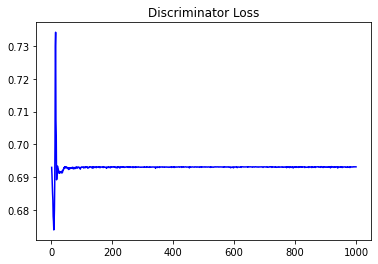

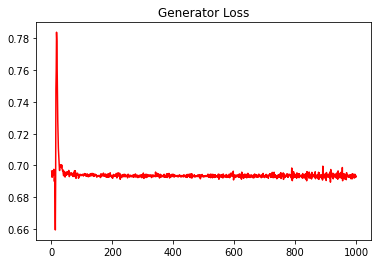

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.03617607408316918


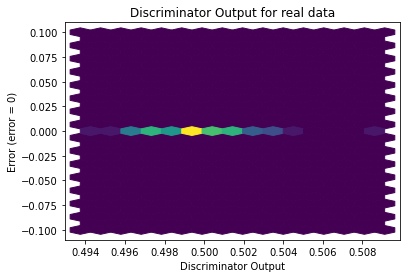

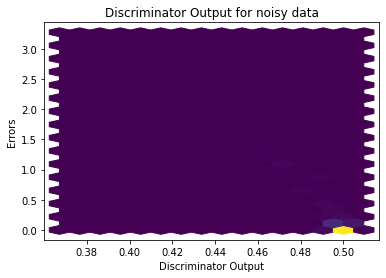

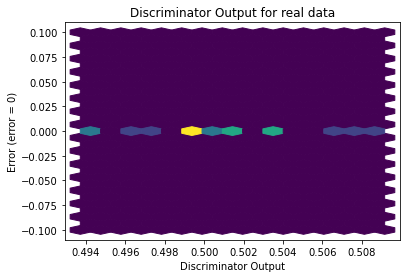

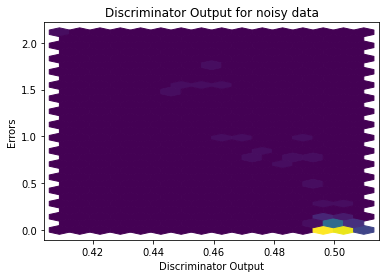

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


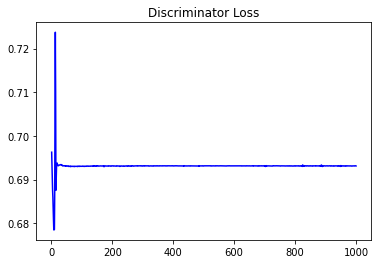

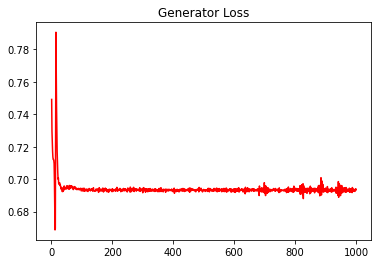

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.038030857147319255


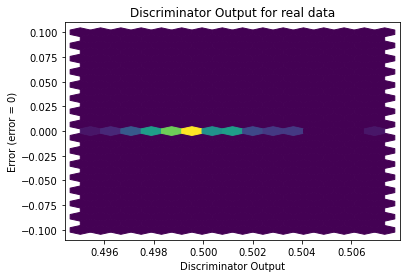

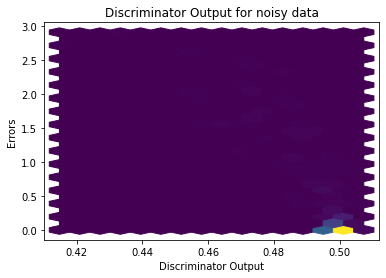

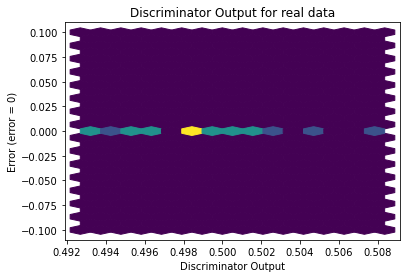

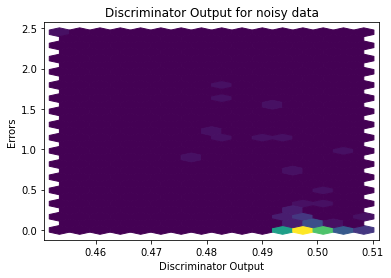

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.8645]], requires_grad=True)
